# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 9 Task 1 - Training and Test Sets
### Assignment by: Kat Weissman

#### General objective:

- Familiarize yourself with scientific programming through the SKLearn / Scikitlearn library. 

#### Python Learning Objectives:
- Preprocessing
- Transformation
- Dummy Variable
- Train and Test

*Recommended learning resources:*
- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
- https://realpython.com/train-test-split-python-data/
- https://pycaret.org/train-test-split/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

### Level 1

### Exercise 1 
Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.
The data set is at https://www.kaggle.com/giovamata/airlinedelaycauses

In [2]:
pd.set_option('display.max_columns', None)  #set display to show all columns

In [3]:
data_link = '/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Data/DelayedFlights.csv'
df = pd.read_csv(data_link)

#### Data Exploration

In [4]:
# Show number of rows and columns in dataframe
df.shape

(1936758, 30)

In [5]:
# Show column names
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Display first 5 rows of dataframe
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# check data set variables
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [8]:
# Check for duplicates
sum(df.duplicated())

0

In [9]:
# Split data frame into train and test set using 20% of data for testing.
train, test = train_test_split(df, test_size=0.2, random_state=24, shuffle=True, stratify=None)

In [10]:
# Check dimensions of train and test data frames
print (train.shape)
print (test.shape)

(1549406, 30)
(387352, 30)


In [11]:
# View summary statistics of each variable in the training set, rounded to 2 decimals.
round(train.describe(),2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1549406.00,1549406.0,1549406.00,1549406.00,1549406.00,1549406.00,1549406.00,1543729.00,1549406.00,1549406.00,1542719.00,1549255.00,1542719.00,1542719.0,1549406.00,1549406.00,1543729.00,1549025.00,1549406.00,1549406.00,998093.00,998093.00,998093.00,998093.00,998093.00
mean,3340709.96,2008.0,6.11,15.75,3.99,1518.70,1467.54,1610.05,1634.44,2183.37,133.28,134.29,108.26,42.2,43.20,765.53,6.81,18.23,0.00,0.00,19.17,3.71,15.03,0.09,25.29
std,2065665.93,0.0,3.48,8.78,2.00,450.45,424.78,548.40,464.55,1943.67,72.04,71.32,68.63,56.8,53.41,574.32,5.26,14.32,0.02,0.06,43.47,21.56,33.90,2.05,42.08
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.0,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517074.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,82.00,58.00,9.0,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3241171.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1706.00,1543.00,116.00,116.00,90.00,24.0,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4970480.25,2008.0,9.00,23.00,6.00,1900.00,1815.00,2031.00,2015.00,3421.00,165.00,165.00,137.00,56.0,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009726.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,1091.00,2461.0,2457.00,4962.00,240.00,422.00,1.00,1.00,1951.00,1352.00,1357.00,392.00,1316.00


In [12]:
# View summary statistics of each variable in the testing set, rounded to 2 decimals.
round(test.describe(),2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,387352.00,387352.0,387352.00,387352.00,387352.00,387352.00,387352.00,385919.00,387352.00,387352.00,385652.00,387305.00,385652.00,385652.00,387352.00,387352.00,385919.00,387278.00,387352.00,387352.00,249395.00,249395.00,249395.00,249395.00,249395.00
mean,3345415.93,2008.0,6.12,15.78,3.98,1517.88,1467.19,1610.49,1633.37,2187.82,133.39,134.36,108.33,42.19,43.14,766.29,6.82,18.25,0.00,0.00,19.21,3.67,15.00,0.09,25.31
std,2067658.68,0.0,3.49,8.77,1.99,450.64,424.70,547.31,464.96,1948.81,72.15,71.41,68.69,56.73,53.37,575.11,5.33,14.40,0.02,0.06,43.83,21.23,33.55,1.92,41.96
min,16.00,2008.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,15.00,-18.00,0.00,-66.00,6.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1519313.00,2008.0,3.00,8.00,2.00,1203.00,1135.00,1317.00,1325.00,610.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3248046.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1544.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4978527.25,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3435.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9740.00,727.00,660.00,652.00,2453.00,2467.00,4962.00,189.00,393.00,1.00,1.00,2436.00,1070.00,761.00,284.00,1184.00


In [13]:
# Check differences of summary statistics of the training and testing set, rounded to 2 decimals.
round(train.describe(),2) - round(test.describe(),2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1162054.00,1162054.0,1162054.00,1162054.00,1162054.00,1162054.00,1162054.00,1157810.00,1162054.00,1162054.00,1157067.00,1161950.00,1157067.00,1157067.00,1162054.00,1162054.00,1157810.00,1161747.00,1162054.0,1162054.0,748698.00,748698.00,748698.00,748698.00,748698.00
mean,-4705.97,0.0,-0.01,-0.03,0.01,0.82,0.35,-0.44,1.07,-4.45,-0.11,-0.07,-0.07,0.01,0.06,-0.76,-0.01,-0.02,0.0,0.0,-0.04,0.04,0.03,0.00,-0.02
std,-1992.75,0.0,-0.01,0.01,0.01,-0.19,0.08,1.09,-0.41,-5.14,-0.11,-0.09,-0.06,0.07,0.04,-0.79,-0.07,-0.08,0.0,0.0,-0.36,0.33,0.35,0.13,0.12
min,-16.00,0.0,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-1.00,-7.00,0.00,-43.00,0.00,-13.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,-2238.50,0.0,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,-6875.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
75%,-8047.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
max,-1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,387.00,0.00,439.00,8.00,-10.00,0.00,51.00,29.00,0.0,0.0,-485.00,282.00,596.00,108.00,132.00


For all of the important statistics, the distributions of the training and testing set variables are equivalent. They have similar means, medians, and standard deviations. The min and max values are different for some variables, which is probably due to outliers in one of the data sets.

In [14]:
def compareDensities(train, test, variable):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Comparison of Train & Test Data: '+ variable)
    sns.kdeplot(data=train, x=variable, ax=ax1).set_ylabel('Train Density')
    sns.kdeplot(data=test, x=variable, ax=ax2).set_ylabel('Test Density')


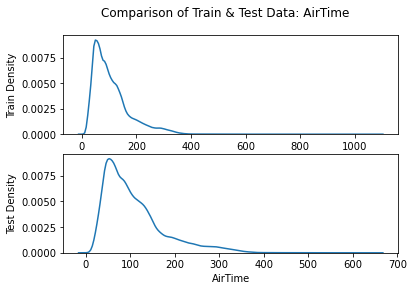

In [15]:
compareDensities(train, test, "AirTime")

By comparing the densities of some individual variables in the training and testing set, we can see that the distributions are nearly identical. The max value for AirTime is larger in the Training set, but the shape of the distribution is the same.

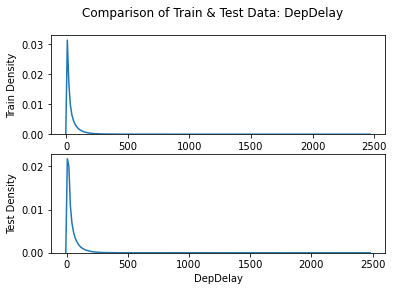

In [16]:
compareDensities(train, test, "DepDelay")

The shape of the distribution for Departure Delay is nearly identical in the training and testing set.

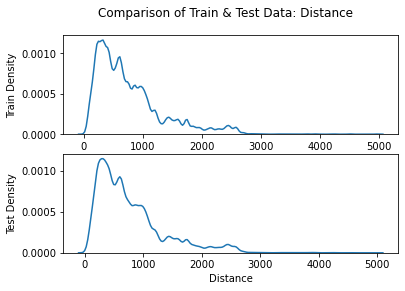

In [17]:
compareDensities(train, test, "Distance")

The shape of the distribution for Distance is very similar in the training and testing set.

### Level 2

### Exercise 2 
Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).

I will revisit this exercise if I have time at the end of the course.

### Level 3

### Exercise 3
Summarizes the new generated columns statistically and graphically 

I will revisit this exercise if I have time at the end of the course.